<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='https://eesp.fgv.br/cursos/pos-graduacao-profissional/mestrado-profissional-financas-e-economia--engenharia-financeira'>
<img align='left' style='display: block;height: 92%' src='logoFGVEESP.png' alt='FGV logo' title='FGV'/>
</a>
</div>


## Técnicas de Inteligência Computacional ll

## Prof. [Gerson de Souza Faria](http://systemssoperfect.com) 

[gerson.faria@fgv.br](mailto:gerson.faria@fgv.br) 


# 4a Lista de exercícios 

## Entrega: 25/8

## Contemplando:

Aula 4 - Otimização Multiobjetivo (utilizando GA)

Aula 5 - Programação Genética

***

## Exercício 1

**(3pts)** Reescreva a solução do TSP (*Travelling Salesperson Problem*) com restrição de cruzamentos nas linhas de longitude e/ou latitude. No exercício da lista anterior, foi pedido que houvesse penalização na função objetivo pelos cruzamentos pela linha imaginária que você criou. Agora, em vez da penalização na função objetivo, o número de cruzamentos por essa linha deverá ser minimizado, juntamente à minimização da distância total. Utilize o DEAP para otimização multiobjetivo. Apresente a fronteira de Pareto e comente os resultados, comparando com a solução obtida anteriormente.


In [10]:
import random
import numpy as np

import matplotlib.pyplot as plt

from deap import algorithms
from deap import base
from deap import creator
from deap import tools


def onevector():
    index = random.randrange(N_)

    return [(1 if i == index else 0) for i in range(N_)]

def distancia(c1, c2):
    # distância euclideana entre dois pontos no espaço complexo (coordenadas dos municípios)
    return abs(c1 - c2)


def distancia_total(percurso):
    return sum(distancia(percurso[i], percurso[i-1])
               for i in range(len(percurso)))

def check_hemisferio(coordenada, cutoff=0):
    if coordenada > cutoff:
        return 'norte'
    else:
        return 'sul'

def cruzamento_latitude(percurso):
    cruzamentos = 0
    for i in range(len(percurso)):
        coord_start = percurso[i]
        coord_end = percurso[i-1]
        if check_hemisferio(coord_start.real) != check_hemisferio(coord_end.real):
            cruzamentos += 1
    return cruzamentos

def cria_percurso(individuo):
    # dado um indivíduo, cria um percurso
    return [list(coordenadas)[e] for e in individuo]

def avalia_percurso_com_restricao(individuo):
    # dado um indivíduo, cria um percurso e calcula a distância euclideana deste percurso
    return (distancia_total(cria_percurso(individuo)), cruzamento_latitude(cria_percurso(individuo)))

def avalia_percurso(individuo):
    # dado um indivíduo, cria um percurso e calcula a distância euclideana deste percurso
    return (distancia_total(cria_percurso(individuo)),)

def cx(ind1, ind2):
    i1 = ind1.index(1)
    i2 = ind2.index(1)

    ind1[i1] = 0
    ind2[i2] = 0

    p1 = i1 & i2
    p2 = (i1 ^ i2) % N_

    ind1[p1] = 1;
    ind2[p2] = 1;

    return ind1, ind2

def mut(individuo):
    i = individuo.index(1)

    # Mutação: muda +/- 1

    if random.random() < 0.5:
        if i <= N_ - 2:
            individuo[i] = 0
            individuo[i + 1] = 1
    elif i > 0:
        individuo[i] = 0
        individuo[i - 1] = 1
    return individuo,

def main():
    random.seed(64)

    NGER = 50
    MU = 50
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.2

    pop = toolbox.populacao(n=MU)

    hof = tools.ParetoFront()

    stats = tools.Statistics(lambda ind: ind.fitness.values)

    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)

    pop, log = algorithms.eaMuPlusLambda(pop,
                                         toolbox,
                                         MU,
                                         LAMBDA,
                                         CXPB,
                                         MUTPB,
                                         NGER,
                                         stats,
                                         halloffame=hof,
                                         verbose=False)

    for e in hof:
        v = avalia_percurso_com_restricao(e)
        print(e.index(1), ' => ', v)

    return hof

def fun(x, y):
    return x**2 + y


In [13]:
Ponto = complex
N_ = 100
x_sel = 2 * (np.random.random_sample(N_) - 0.5)
y_sel = 2 * (np.random.random_sample(N_) - 0.5)
coordenadas = [Ponto(x_sel[i], y_sel[i]) for i in range(N_)]
numPontos = len(coordenadas)

ind = onevector()
ind.index(1)

# 4 opções para duas funções objetivo
maximizar = [(1, 1),  # max f1, max f2
             (1, -1),  # max f1, min f2
             (-1, 1),  # min f1, max f2
             (-1, -1)]  # min f1, min f2

# seletor de opção
opcao = 3

# Fixa semente para garantir reprodutibilidade
random.seed(1234)

creator.create("Fitness", base.Fitness, weights=maximizar[opcao])

# Individuo é do tipo 'list' do Python
creator.create("Individuo", list, fitness=creator.Fitness)

toolbox = base.Toolbox()

# A cada chamada, gera um vetor de tamanho N com apenas uma posição 1

toolbox.register("individuo", tools.initIterate, creator.Individuo, onevector)

toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)

ind = toolbox.individuo()
in1 = toolbox.individuo()
in2 = toolbox.individuo()
cx(in1, in2)

ind = toolbox.individuo()
mut(ind)

toolbox.register("evaluate", avalia_percurso_com_restricao)
toolbox.register("mate", cx)
toolbox.register("mutate", mut)

# registro do algoritmo de seleção.

# NSGA2 é para EMO e seleciona elementos
# mais próximos do ótimo de Pareto

toolbox.register("select", tools.selNSGA2)

hof = main()

31  =>  (1.4900954470396794, 0)
23  =>  (1.4900954470396794, 0)
77  =>  (1.4900954470396794, 0)
57  =>  (1.4900954470396794, 0)
73  =>  (1.4900954470396794, 0)
29  =>  (1.4900954470396794, 0)
82  =>  (1.4900954470396794, 0)
76  =>  (1.4900954470396794, 0)
91  =>  (1.4900954470396794, 0)
49  =>  (1.4900954470396794, 0)
35  =>  (1.4900954470396794, 0)
93  =>  (1.4900954470396794, 0)
94  =>  (1.4900954470396794, 0)
79  =>  (1.4900954470396794, 0)
61  =>  (1.4900954470396794, 0)
84  =>  (1.4900954470396794, 0)
74  =>  (1.4900954470396794, 0)
85  =>  (1.4900954470396794, 0)
20  =>  (1.4900954470396794, 0)
19  =>  (1.4900954470396794, 0)
67  =>  (1.4900954470396794, 0)
59  =>  (1.4900954470396794, 0)
81  =>  (1.4900954470396794, 0)
88  =>  (1.4900954470396794, 0)
66  =>  (1.4900954470396794, 0)
65  =>  (1.4900954470396794, 0)
7  =>  (1.4900954470396794, 0)
38  =>  (1.4900954470396794, 0)
21  =>  (1.4900954470396794, 0)
55  =>  (1.4900954470396794, 0)
96  =>  (1.4900954470396794, 0)
12  =>  (

<Figure size 1080x360 with 0 Axes>

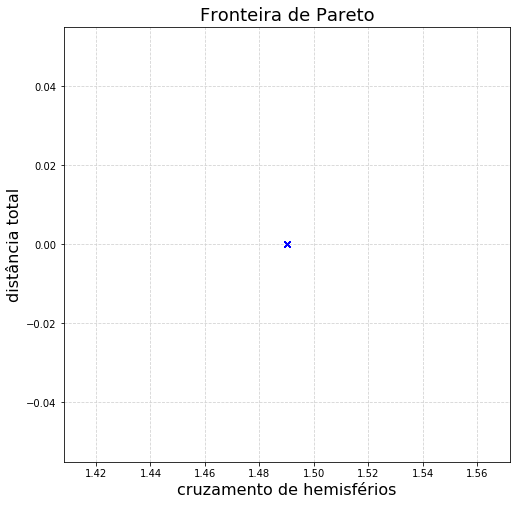

<Figure size 1080x360 with 0 Axes>

In [17]:
plt.figure(figsize=(8, 8))

for e in hof:
    v = avalia_percurso_com_restricao(e)
    plt.plot(v[0], v[1], 'xb')

plt.xlabel("cruzamento de hemisférios", fontsize=16)
plt.ylabel("distância total", fontsize=16);

plt.grid(b=True, which='major', color='lightgray', linestyle='--')

plt.title("Fronteira de Pareto", fontsize=18)

plt.figure(figsize=(15, 5))

# plotar funçoes objetivo
# plt.plot(x, f1, x, f2)

## Exercício 2

**(3pts)** Utilize o DEAP para encontrar a fronteira de Pareto da [Função Schaffer N.2](https://en.wikipedia.org/wiki/Test_functions_for_optimization). Dica: funções prontas de cruzamento e mutação de 'float' no DEAP: `cxBlend` e `mutGaussian`.

In [ ]:
import random
import numpy as np

import matplotlib.pyplot as plt

from deap import algorithms
from deap import base
from deap import creator
from deap import tools


def schaffer2(x,y,const=1/2):
    return const + (np.sin(x**2 + y**2)**2 - 1/2) / (1 + 0.001*(x**2 + y**2))**2

def schaffer2_maker(const):
    def f(x,y):
        return schaffer2(x,y,const)
    return f

def onevector():
    index = random.randrange(N)

    return [(1 if i == index else 0) for i in range(N)]

def evalObjetivos(individuo):
    i = individuo.index(1)
    return (f1[i], f2[i],)

def cx(ind1, ind2):
    i1 = ind1.index(1)
    i2 = ind2.index(1)

    ind1[i1] = 0
    ind2[i2] = 0

    p1 = i1 & i2
    p2 = (i1 ^ i2) % N

    ind1[p1] = 1;
    ind2[p2] = 1;

    return ind1, ind2

def mut(individuo):
    i = individuo.index(1)

    # Mutação: muda +/- 1

    if random.random() < 0.5:
        if i <= N - 2:
            individuo[i] = 0
            individuo[i + 1] = 1
    elif i > 0:
        individuo[i] = 0
        individuo[i - 1] = 1
    return individuo,

def main():
    random.seed(64)

    NGER = 50
    MU = 50
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.2

    pop = toolbox.populacao(n=MU)

    hof = tools.ParetoFront()

    stats = tools.Statistics(lambda ind: ind.fitness.values)

    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)

    pop, log = algorithms.eaMuPlusLambda(pop,
                                         toolbox,
                                         MU,
                                         LAMBDA,
                                         CXPB,
                                         MUTPB,
                                         NGER,
                                         stats,
                                         halloffame=hof,
                                         verbose=False)

    for e in hof:
        v = evalObjetivos(e)
        print(e.index(1), ' => ', v)

    return hof

def fun(x, y):
    return x**2 + y


In [ ]:
N = 1000

x = np.linspace(-100, 100, N)
y = np.linspace(-100, 100, N)

f1 = schaffer2_maker(const=0)(x, y)
f2 = schaffer2_maker(const=1/2)(x, y)

ind = onevector()
ind.index(1)

# 4 opções para duas funções objetivo
maximizar = [(1, 1),  # max f1, max f2
             (1, -1),  # max f1, min f2
             (-1, 1),  # min f1, max f2
             (-1, -1)]  # min f1, min f2

# seletor de opção
opcao = 3

# Fixa semente para garantir reprodutibilidade
random.seed(1234)

creator.create("Fitness", base.Fitness, weights=maximizar[opcao])

# Individuo é do tipo 'list' do Python
creator.create("Individuo", list, fitness=creator.Fitness)

toolbox = base.Toolbox()

# A cada chamada, gera um vetor de tamanho N com apenas uma posição 1

toolbox.register("individuo", tools.initIterate, creator.Individuo, onevector)

toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)

ind = toolbox.individuo()
in1 = toolbox.individuo()
in2 = toolbox.individuo()
cx(in1, in2)

ind = toolbox.individuo()
mut(ind)

toolbox.register("evaluate", evalObjetivos)
toolbox.register("mate", cx)
toolbox.register("mutate", mut)

# registro do algoritmo de seleção.

# NSGA2 é para EMO e seleciona elementos
# mais próximos do ótimo de Pareto

toolbox.register("select", tools.selNSGA2)

hof = main()

plt.figure(figsize=(8, 8))

for e in hof:
    v = evalObjetivos(e)
    plt.plot(v[0], v[1], 'xb')

plt.xlabel("f1", fontsize=16)
plt.ylabel("f2", fontsize=16);

plt.grid(b=True, which='major', color='lightgray', linestyle='--')

plt.title("Fronteira de Pareto", fontsize=18)

plt.figure(figsize=(15, 5))

# plotar funçoes objetivo
plt.plot(x, f1, x, f2)

l1 = "f1: %s" % ('maximizar' if maximizar[opcao][0] > 0 else 'minimizar')
l2 = "f2: %s" % ('maximizar' if maximizar[opcao][1] > 0 else 'minimizar')

plt.legend([l1, l2], fontsize=16)

for e in hof:
    i = e.index(1)
    plt.plot(x[i], f1[i], 'xb')
    plt.plot(x[i], f2[i], 'xb')

plt.xlabel("x", fontsize=16)
plt.show()

## Exercício 3

**(4pts)** Obtenha dados de alguma origem, à sua escolha. Crie um modelo de regressão simbólica para os dados utilizando DEAP. Comente o experimento e analise os resultados.

In [1]:
from deap import gp
import operator
from deap import creator
from deap import base
from deap import tools
import numpy as np
from deap import algorithms
import math

def forward_uip(*args):
    arg1, arg2, arg3 = args
    return arg1 * (1+arg2) / (1+arg3)

def avaliaFitness(individuo, points):
    func = toolbox.compilador(expr=individuo)
    sqerrors = ((func(*args) - forward_uip(*args)) ** 2 for args in points)

    return (math.fsum(sqerrors) / len(points),)

def main():
    pop = toolbox.populacao(n=1500)
    hof = tools.HallOfFame(4)

    CXPB = .9
    MTPB = .01

    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)

    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop,
                                   toolbox,
                                   CXPB,
                                   MTPB,
                                   50,
                                   stats=mstats,
                                   halloffame=hof,
                                   verbose=True)

    return pop, log, hof

De acordo com a teoria de "covered interest rate parity", a taxa de cambio forward pode ser determinada da seguinte forma:

$$
F_t = \frac {S_t(1 + i_\$)}{(1 + i_c)} 
$$

onde $ i_\$ $ é o juros local e $ i_c $ é o juros da moeda estrangeira.

Usaremos a taxa de cambio do real contra o dolar, e para os juros de referência usaremos  o cdi e o fed funds. Vamos verificar se a regressão simbolica consegue aprender essa relação.

In [2]:
import pandas as pd
import os

rates = pd.read_excel('USDBRL_interest_rates.xlsx') 
usdbrl = pd.read_csv('USDBRL.csv')

In [3]:
rates.head()

,date,PREDI90 Index,FEDL01 Index
0,2005-01-14,18.43,2.25
1,2005-01-21,18.71,2.28
2,2005-01-28,18.94,2.27
3,2005-02-04,18.94,2.43
4,2005-02-11,18.94,2.50


In [4]:
usdbrl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/28/2015,3.9713,4.0368,3.9708,3.9676,3.9676,0.0
1,9/29/2015,4.1038,4.1443,4.0714,4.1037,4.1037,0.0
2,9/30/2015,4.0549,4.0600,3.9503,4.0544,4.0544,0.0
3,10/1/2015,3.9455,3.9931,3.9348,3.9457,3.9457,0.0
4,10/2/2015,3.9993,4.0373,3.9572,3.9988,3.9988,0.0


In [5]:
rates = rates.set_index('date')
usdbrl = usdbrl.set_index('Date')

df = pd.merge(usdbrl, rates, right_index=True, left_index=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,PREDI90 Index,FEDL01 Index
2015-10-02,3.9993,4.0373,3.9572,3.9988,3.9988,0.0,14.534,0.12
2015-10-09,3.7808,3.7832,3.7201,3.7819,3.7819,0.0,14.351,0.13
2015-10-16,3.7933,3.8561,3.7902,3.7925,3.7925,0.0,14.370,0.13
2015-10-23,3.9025,3.9245,3.8616,3.9023,3.9023,0.0,14.341,0.13
2015-10-30,3.8441,3.8840,3.8250,3.8447,3.8447,0.0,14.382,0.12


In [6]:
df = df[['Close', 'PREDI90 Index', 'FEDL01 Index']]
df.columns = ['usdbrl', 'brl_rate', 'us_rate']

In [7]:
X1 = df.copy()
pontos = X1.values

In [11]:
pset = gp.PrimitiveSet("MAIN", 3)

pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(operator.neg, 1)

pset.renameArguments(ARG0='val1')
pset.renameArguments(ARG0='val2')
pset.renameArguments(ARG0='val3')

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individuo", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("expressao", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individuo", tools.initIterate, creator.Individuo, toolbox.expressao)
toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)
toolbox.register("compilador", gp.compile, pset=pset)

toolbox.register("evaluate", avaliaFitness, points=pontos)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=3))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=3))


pop, log, hof = main()

   	      	                       fitness                        	                      size                     
   	      	------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max        	min    	nevals	std   	avg    	gen	max	min	nevals	std    
0  	1500  	22611.3	0  	2.94945e+07	34.1641	1500  	762162	3.97133	0  	7  	2  	1500  	1.68003
1  	1339  	926.486	1  	169176     	50.5222	1339  	6187.07	4.01733	1  	9  	2  	1339  	1.55939
2  	1333  	547.969	2  	42480.8    	13.6444	1333  	2099.19	4.07   	2  	9  	1  	1333  	1.4948 
3  	1332  	838.173	3  	249671     	12.8361	1332  	7798.35	4.124  	3  	11 	1  	1332  	1.49821
4  	1332  	255.722	4  	15295.5    	13.6444	1332  	1069.55	4.20667	4  	11 	1  	1332  	1.49174
5  	1375  	220.274	5  	38828      	13.6444	1375  	1604.03	4.29533	5  	11 	1  	1375  	1.47381
6  	1362  	246.314	6  	25038.7    	8.12801	1362  	1314.72	4.74067	6  	11 	1  	1362  	1.62483
7  	1316  	239.891	7  	50774.4

In [15]:
list_y = []
for i in range(0, 4):  
    func = toolbox.compilador(expr=hof[i])
    y =  [func(x[0], x[1], x[2]) for x in pontos]
    list_y.append(y)
pred_y = pd.DataFrame(list_y).T
pred_y.columns = ['hall_of_fame_pred1', 'hall_of_fame_pred2', 'hall_of_fame_pred3', 'hall_of_fame_pred4']

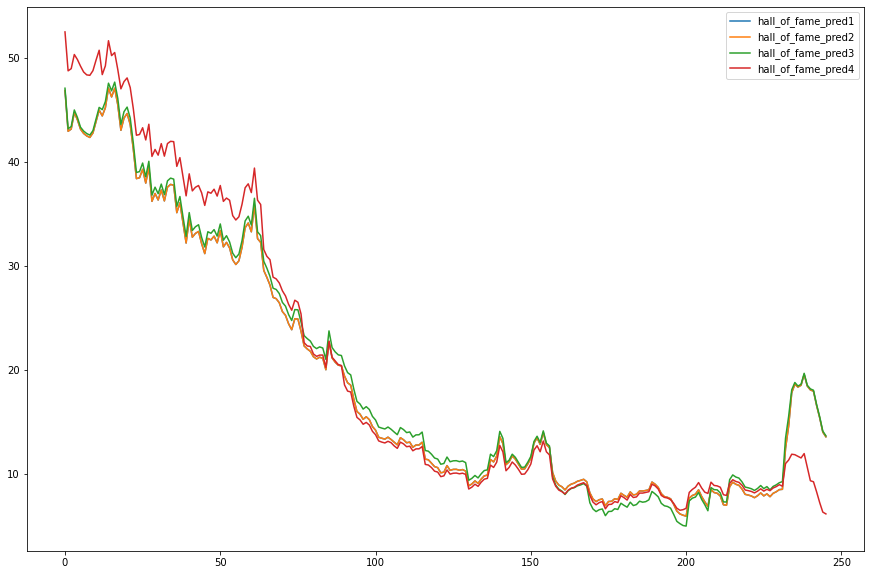

In [18]:
pred_y.plot(figsize=(15,10))

In [30]:
y_real = [forward_uip(*args) for args in pontos]

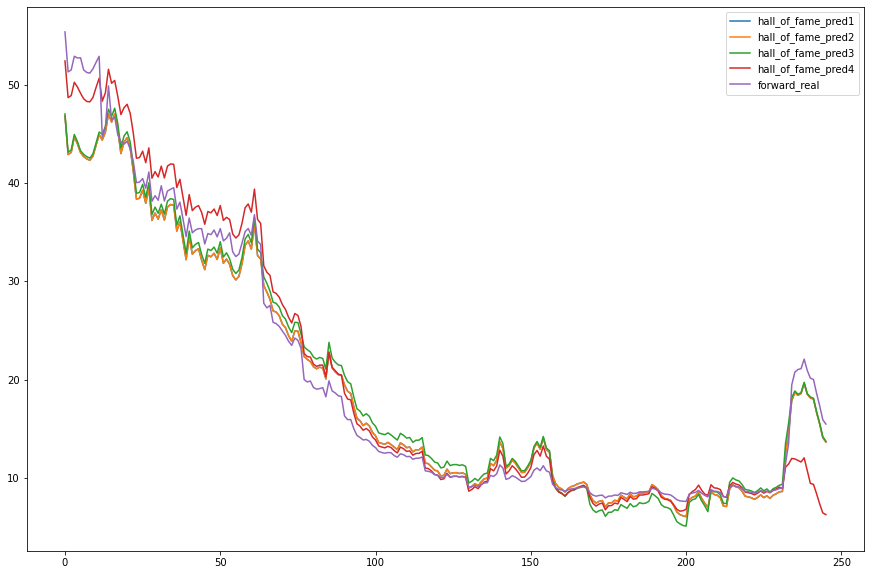

In [29]:
 pd.concat([pred_y, pd.DataFrame(data=y_real, columns=['forward_real'])], axis=1).plot(figsize=(15,10))

É possível ver que, de maneira geral, os individuos do hall da fama são uma boa aproximação do valor analítico do forward (linha roxa). É importante notar dois fatos, primeiro  o algoritmo da regressão atinge uma aproximação razoével mesmo sem convergir (nvals); segundo o algoritmo atinge essa aproximação utilizando operações bem simples como adição, subtração, e multiplicação.